In [65]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Question 1

In [66]:
df = pd.read_csv('section_1.csv')

In [67]:
df

,label,summary
0,1,The CMA is investigating the anticipated acqui...
1,1,The CMA is investigating the completed acquisi...
2,1,The CMA investigated and cleared the completed...
3,1,The CMA investigated and cleared the completed...
4,1,The CMA is investigating the anticipated acqui...
...,...,...
495,1,Motor Fuel Group must address CMA concerns ove...
496,0,The CMA has issued court proceedings against v...
497,0,The CMA is investigating whether online gambli...
498,1,The CMA has provisionally found that the propo...


## Question 2

In [68]:
from nltk.corpus import stopwords

In [69]:
stopwords = stopwords.words('english')

In [73]:
df['summary_no_stopwords'] = 0
df['tokenized_words'] = 0
df['stemmed_words'] = 0

In [74]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [75]:
for i in range(len(df.summary)):
    temp = df.summary[i].lower().split()
    temp = [x for x in temp if x not in stopwords]
    df['tokenized_words'][i] = ' '.join(temp)
    stemmed_words = [stemmer.stem(x) for x in temp]
    df['stemmed_words'][i] = ' '.join(stemmed_words)
    string_no_stopwords = ' '.join(temp)
    df['summary_no_stopwords'][i] = string_no_stopwords
    

In [76]:
df.head()

,label,summary,summary_no_stopwords,tokenized_words,stemmed_words
0,1,The CMA is investigating the anticipated acqui...,cma investigating anticipated acquisition plat...,cma investigating anticipated acquisition plat...,cma investig anticip acquisit platinum equiti ...
1,1,The CMA is investigating the completed acquisi...,cma investigating completed acquisition danspi...,cma investigating completed acquisition danspi...,cma investig complet acquisit danspin a/ certa...
2,1,The CMA investigated and cleared the completed...,cma investigated cleared completed acquisition...,cma investigated cleared completed acquisition...,cma investig clear complet acquisit kohlberg &...
3,1,The CMA investigated and cleared the completed...,cma investigated cleared completed acquisition...,cma investigated cleared completed acquisition...,cma investig clear complet acquisit kohlberg &...
4,1,The CMA is investigating the anticipated acqui...,cma investigating anticipated acquisition ln-g...,cma investigating anticipated acquisition ln-g...,cma investig anticip acquisit ln-gaieti hold l...


## Question 3

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
documents = list(df.stemmed_words)

In [78]:
count_vec = CountVectorizer()

In [79]:
count_vec.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [81]:
document_term_matrix = pd.DataFrame(count_vec.transform(documents).todense(), columns=count_vec.get_feature_names())


In [84]:
document_term_matrix

,000,101,102,12,13,16,17,18,19,1998,...,woollen,work,world,wors,would,written,xbox,yarn,year,àr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Question 4

In [177]:
document_term_matrix.shape

(500, 1404)

## Question 5

In [104]:
word_feq = []

In [106]:
for i in document_term_matrix.columns:
    word_feq.append([i,document_term_matrix[i].sum()])

In [107]:
word_feq

[['000', 24],
 ['101', 18],
 ['102', 7],
 ['12', 2],
 ['13', 1],
 ['16', 2],
 ['17', 3],
 ['18', 2],
 ['19', 1],
 ['1998', 6],
 ['20', 3],
 ['2002', 1],
 ['2005', 1],
 ['2008', 4],
 ['2009', 4],
 ['2011', 5],
 ['2014', 2],
 ['2015', 1],
 ['2016', 2],
 ['2017', 6],
 ['2018', 13],
 ['2019', 14],
 ['2020', 2],
 ['2050', 1],
 ['21', 1],
 ['25', 23],
 ['28', 1],
 ['31', 4],
 ['36', 1],
 ['500', 22],
 ['50511', 3],
 ['67', 1],
 ['6m', 2],
 ['8m', 1],
 ['8th', 1],
 ['aam', 1],
 ['ab', 4],
 ['abandon', 1],
 ['abellio', 1],
 ['abus', 2],
 ['abuse', 2],
 ['academ', 1],
 ['accommodation', 1],
 ['account', 8],
 ['accounts', 1],
 ['achiev', 1],
 ['acquir', 1],
 ['acquisit', 100],
 ['across', 1],
 ['act', 11],
 ['action', 11],
 ['activ', 2],
 ['activity', 2],
 ['addison', 1],
 ['address', 4],
 ['adjust', 1],
 ['admiss', 1],
 ['admit', 3],
 ['advent', 3],
 ['advertis', 3],
 ['advic', 7],
 ['advis', 3],
 ['advisori', 1],
 ['aer', 2],
 ['affect', 3],
 ['ag', 3],
 ['agenc', 2],
 ['agency', 1],
 ['agent'

In [144]:
words = []
freq = []
for i in range(len(word_feq)):
    words.append(word_feq[i][0])
    freq.append(word_feq[i][1])

In [145]:
frequency_of_words = pd.DataFrame({'words':words, 'freq':freq})

In [153]:
top_10 = frequency_of_words.sort_values(by = 'freq', ascending=False)[:10]

In [184]:
top_10.reset_index(drop=True, inplace=True)

In [186]:
word_count_dict = {}
for i in range(len(top_10)):
    word_count_dict[top_10.words[i]] = top_10.freq[i]

In [187]:
word_count_dict

{'cma': 363,
 'investig': 174,
 'competit': 118,
 'acquisit': 100,
 'market': 76,
 'group': 57,
 'anticip': 55,
 'limit': 54,
 'clear': 48,
 'spend': 45}

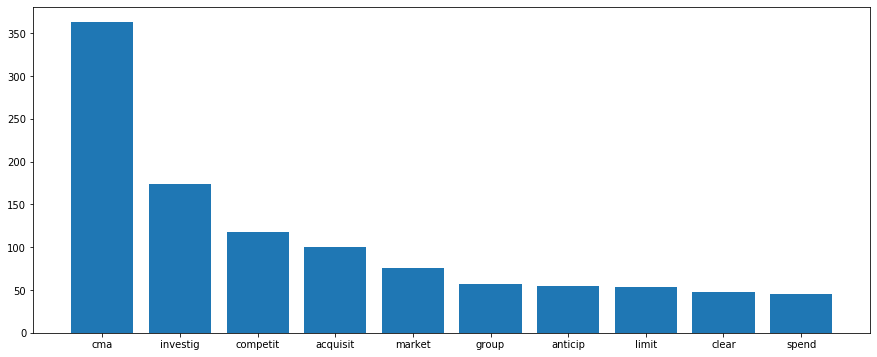

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.bar(x = top_10.words, height= top_10.freq)
plt.show()

## Question 6

In [164]:
document_term_matrix['labelML'] = df.label

In [165]:
document_term_matrix

,000,101,102,12,13,16,17,18,19,1998,...,work,world,wors,would,written,xbox,yarn,year,àr,labelML
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
